# Band ratios
Band ratios can be constructed to (among other things) measure the general slope of the spectra across specific regions. Absorbtion features will have a larger slope than spectrally flat (absorbtion-free) regions, and this slope will corellate with absorbtion depth.

In [1]:
import hylite
from hylite import io
import numpy as np
from hylite.analyse import band_ratio # import the band ratio function
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# load datasets to play with
image = io.load('/Users/rachdi18/Documents/Namibia_Epembe/final_subsets/final/hymap_final_sub.hdr')

In [7]:
image.get_wavelengths()

array([ 473.5     ,  488.200012,  502.799988,  517.799988,  533.099976,
        547.599976,  562.099976,  577.200012,  592.200012,  606.799988,
        621.200012,  635.799988,  650.400024,  664.700012,  679.099976,
        693.799988,  708.400024,  722.599976,  736.799988,  751.299988,
        765.5     ,  779.599976,  793.799988,  808.200012,  822.5     ,
        836.599976,  850.799988,  864.900024,  878.400024,  891.299988,
        896.400024,  911.5     ,  927.      ,  942.599976,  958.400024,
        973.599976,  989.      , 1004.599976, 1019.900024, 1034.900024,
       1049.900024, 1065.      , 1079.800049, 1094.400024, 1109.099976,
       1124.      , 1138.599976, 1152.800049, 1167.199951, 1181.699951,
       1196.      , 1209.900024, 1224.      , 1238.300049, 1252.300049,
       1266.300049, 1280.199951, 1294.      , 1307.599976, 1321.5     ,
       1335.099976, 1447.400024, 1461.699951, 1476.      , 1490.199951,
       1504.      , 1517.599976, 1531.300049, 1545.099976, 1558.

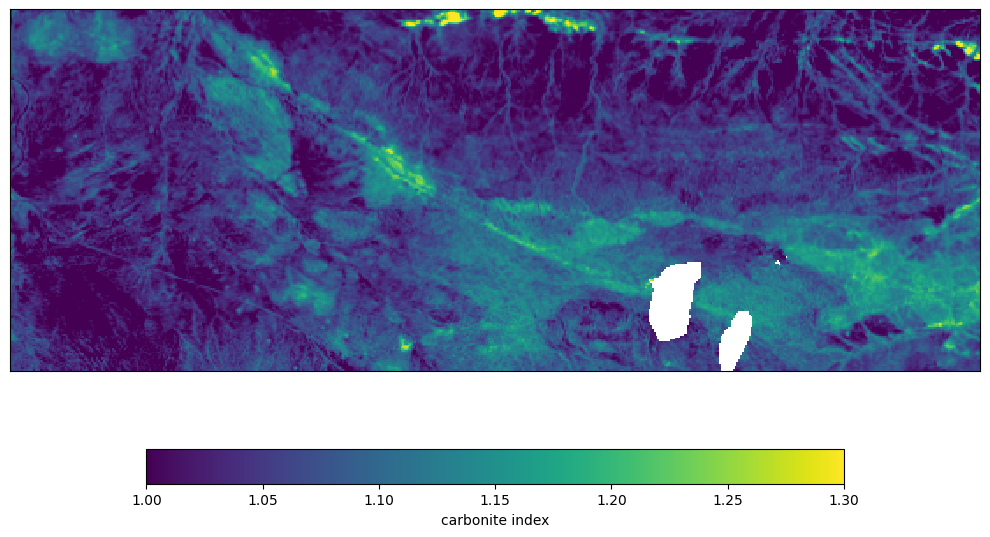

In [4]:
#Calcite band ratio Formula
calcite= band_ratio (image, (2190.,2224.),(2293.,2345.8))
calcite.data *= band_ratio (image, (2375.6,2430.),(2293.,2345.8)).data
calcite.set_as_nan(0)  # Useful for handling no-data values.
fig,ax =calcite.quick_plot(vmin=1., vmax=1.3)
cbar = fig.colorbar( ax.cbar, orientation='horizontal', shrink=0.5)
cbar.set_label("carbonite index")

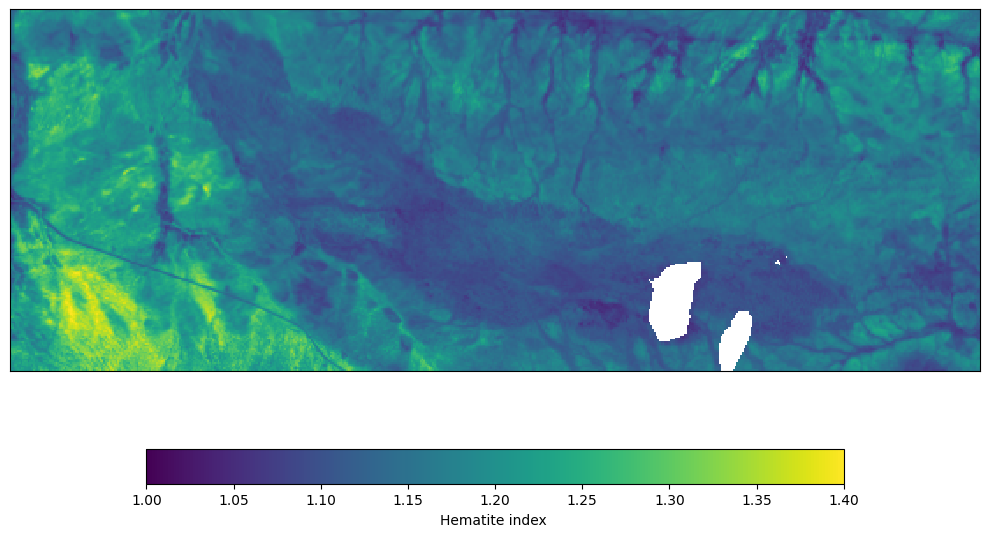

In [5]:
#Hematite band ratio Formula
Hematite = band_ratio(image, (600.), (570.))
Hematite.set_as_nan(0) # Useful for handling no-data values.
fig,ax =Hematite.quick_plot(0, vmin=1., vmax=1.4)
cbar = fig.colorbar( ax.cbar, orientation='horizontal', shrink=0.5)
cbar.set_label("Hematite index ")
fig.show()

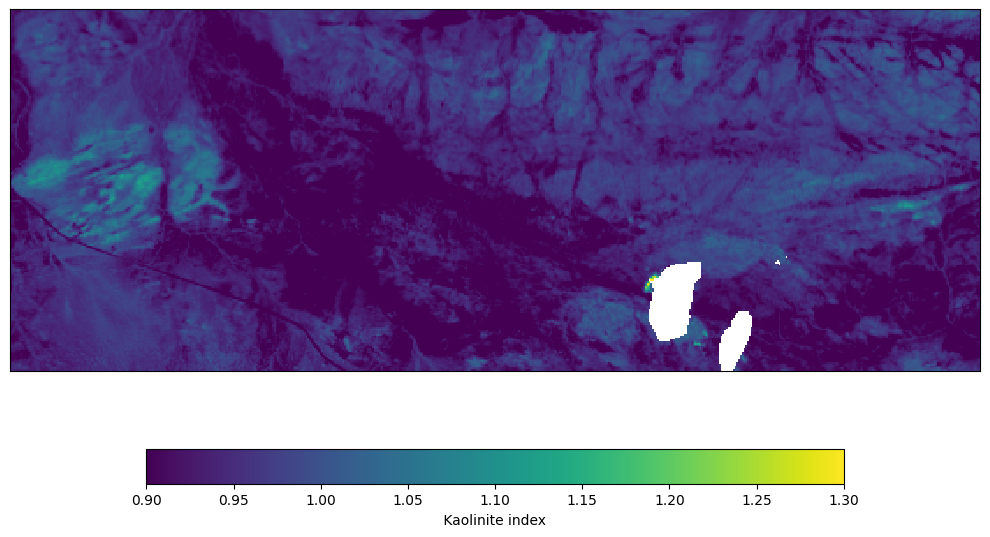

In [6]:
#Kaolinite band ratio Formula
Kaolinite= band_ratio (image, (1600.,1700.),(2145.,2185.))
Kaolinite.data *= band_ratio (image, (2295.,2365.),(2185.,2225.)).data
Kaolinite.set_as_nan(0) # Useful for handling no-data values.
fig,ax =Kaolinite.quick_plot(vmin=0.9, vmax=1.3)
cbar = fig.colorbar( ax.cbar, orientation='horizontal', shrink=0.5)
cbar.set_label(" Kaolinite index ")
fig.show()

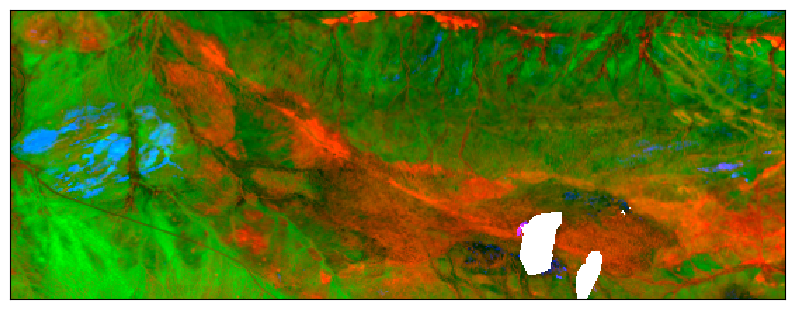

In [8]:
# RGB composite of band ratios
stack_hymap_ep = hylite.HyImage(np.clip(np.dstack([(calcite.data - 1.0) / 0.2,
                                                      (Hematite.data - 1.) / 0.4,
                                                      (Kaolinite.data - 1.0) / 0.06]), 0, 1))
#projection
stack_hymap_ep.set_projection_EPSG( image.get_projection_EPSG())
stack_hymap_ep.affine = image.affine
fig = stack_hymap_ep.quick_plot((0,1,2),figsize=(10,5), ticks =False)

In [9]:
io.save('/Users/rachdi18/Documents/Namibia_Epembe/Results/BR/hymap_BR', stack_hymap_ep)

In [10]:
enmap_ep = io.load('/Users/rachdi18/Documents/Namibia_Epembe/final_subsets/final/enmap_final_sub.hdr')

In [11]:
enmap_ep.get_wavelengths()

array([ 418.415985,  424.042999,  429.457001,  434.686005,  439.757996,
        444.699005,  449.539001,  454.306   ,  459.031006,  463.730011,
        468.411011,  473.079987,  477.743988,  482.411011,  487.087006,
        491.779999,  496.497009,  501.243011,  506.019989,  510.82901 ,
        515.671997,  520.551025,  525.46698 ,  530.424011,  535.421997,
        540.463013,  545.551025,  550.687012,  555.872986,  561.112   ,
        566.405029,  571.755981,  577.166016,  582.635986,  588.171021,
        593.77301 ,  599.445984,  605.192993,  611.017029,  616.922974,
        622.921021,  628.987   ,  635.112   ,  641.294006,  647.536987,
        653.841003,  660.20697 ,  666.637024,  673.130981,  679.690979,
        686.31897 ,  693.013977,  699.780029,  706.617004,  713.523987,
        720.500977,  727.544983,  734.653992,  741.825989,  749.059998,
        756.353027,  763.703003,  771.107971,  778.567017,  786.078003,
        793.638977,  801.249023,  808.905029,  816.607971,  824.

In [3]:
enmap_ep = io.load('/Users/rachdi18/Documents/Namibia_Epembe/final_subsets/final/enmap_final_sub.hdr')

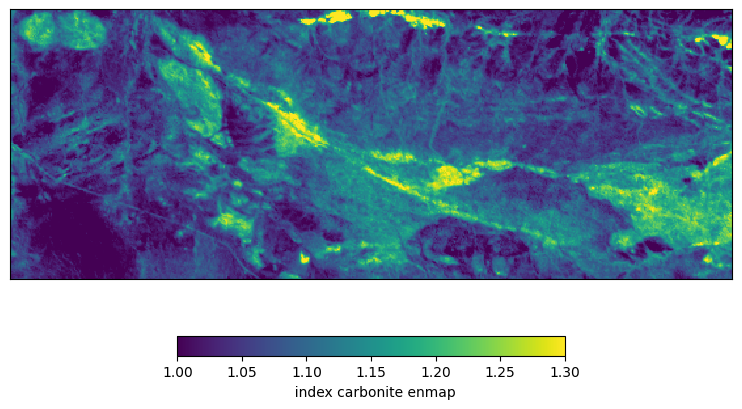

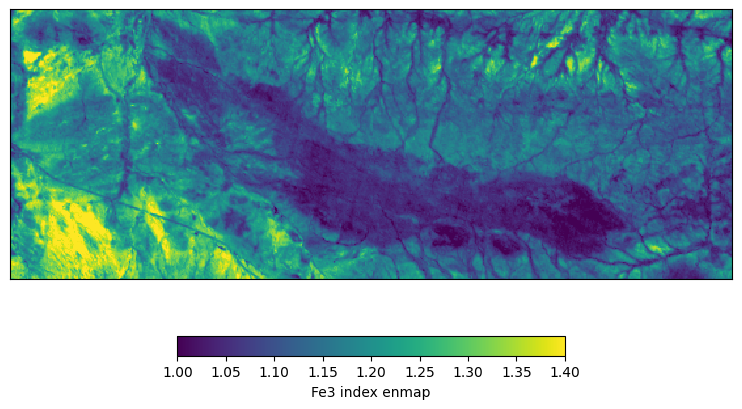

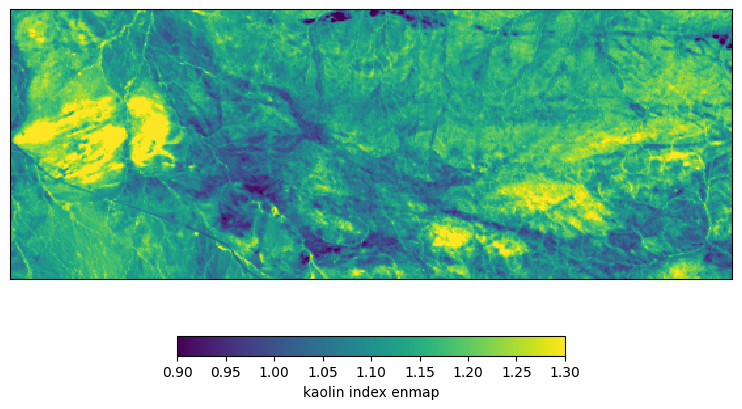

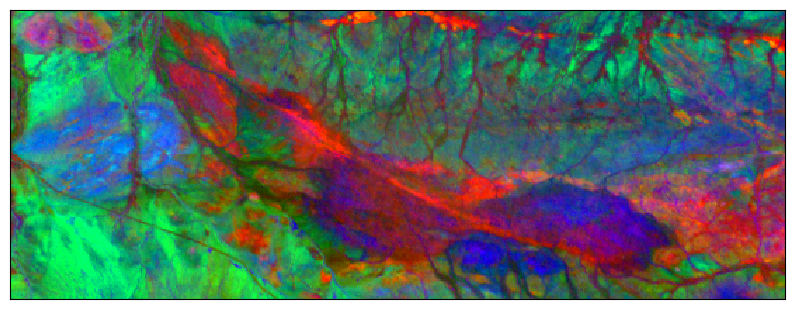

In [11]:
#Enmap
calcite_enmap= band_ratio (enmap_ep, (2190.,2224.),(2293.,2345.))
calcite_enmap.data *= band_ratio (enmap_ep, (2375.6,2430.),(2293.,2345.)).data
fig,ax =calcite_enmap.quick_plot(vmin=1., vmax=1.3, figsize=(10,5))
cbar = fig.colorbar( ax.cbar, orientation='horizontal', shrink=0.5)
cbar.set_label("  index carbonite enmap")
Fe3_enmap = band_ratio(enmap_ep, 600., 570.)
Fe3_enmap.set_as_nan(0)
fig,ax =Fe3_enmap.quick_plot(0, vmin=1., vmax=1.4, figsize=(10,5))
cbar = fig.colorbar( ax.cbar, orientation='horizontal', shrink=0.5)
cbar.set_label("Fe3 index enmap")
fig.show()
kaolin_enmap = band_ratio(enmap_ep,(1600., 1700.),(2145.,2185.))
kaolin_enmap.data *= band_ratio (enmap_ep, (2295.,2365.),(2185.,2225.)).data
fig,ax =kaolin_enmap.quick_plot(0, vmin=0.9, vmax=1.3, figsize=(10,5))
cbar = fig.colorbar( ax.cbar, orientation='horizontal', shrink=0.5)
cbar.set_label("kaolin index enmap")
fig.show()

#Enmap

stack_enmap_ep = hylite.HyImage(np.clip(np.dstack([(calcite_enmap.data - 1.0) / 0.3,
                                                      (Fe3_enmap.data-1) / 0.4,
                                                      (kaolin_enmap.data - 1.) / 0.4]), 0, 1))
#projection
stack_enmap_ep.set_projection_EPSG( enmap_ep.get_projection_EPSG())
stack_enmap_ep.affine = enmap_ep.affine
fig,ax = stack_enmap_ep.quick_plot((0,1,2),figsize=(10,5), ticks =False)

In [12]:
io.save('/Users/rachdi18/Documents/Namibia_Epembe/Results/BR/enmap_BR', stack_enmap_ep)

In [12]:
emit_ep = io.load('/Users/rachdi18/Documents/Namibia_Epembe/final_subsets/final/emit_final_sub.hdr')

In [14]:
emit_ep.get_wavelengths()

array([ 381.00558,  388.4092 ,  395.81583,  403.2254 ,  410.638  ,
        418.0536 ,  425.47214,  432.8927 ,  440.31726,  447.7428 ,
        455.17035,  462.59888,  470.0304 ,  477.46292,  484.89743,
        492.33292,  499.77142,  507.2099 ,  514.6504 ,  522.0909 ,
        529.5333 ,  536.9768 ,  544.42126,  551.8667 ,  559.3142 ,
        566.7616 ,  574.20905,  581.6585 ,  589.108  ,  596.55835,
        604.0098 ,  611.4622 ,  618.9146 ,  626.36804,  633.8215 ,
        641.2759 ,  648.7303 ,  656.1857 ,  663.6411 ,  671.09753,
        678.5539 ,  686.0103 ,  693.4677 ,  700.9251 ,  708.38354,
        715.84094,  723.2993 ,  730.7587 ,  738.2171 ,  745.6765 ,
        753.1359 ,  760.5963 ,  768.0557 ,  775.5161 ,  782.97754,
        790.4379 ,  797.89935,  805.36176,  812.8232 ,  820.2846 ,
        827.746  ,  835.2074 ,  842.66986,  850.1313 ,  857.5937 ,
        865.0551 ,  872.5176 ,  879.98004,  887.44147,  894.90393,
        902.3664 ,  909.82886,  917.2913 ,  924.7538 ,  932.21

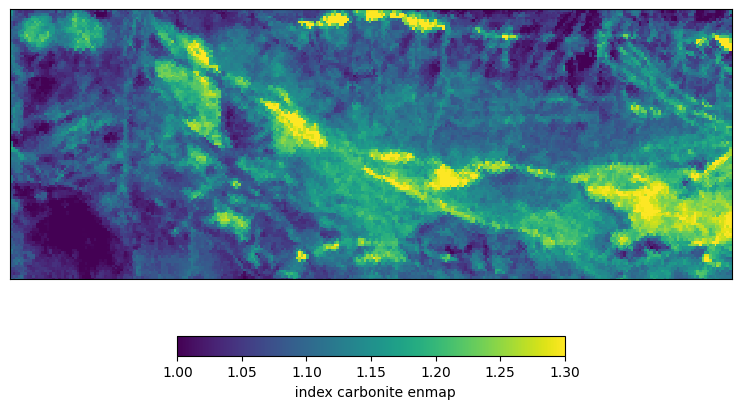

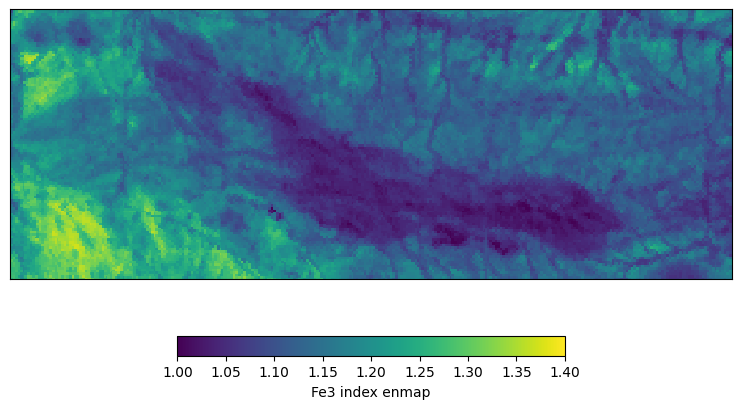

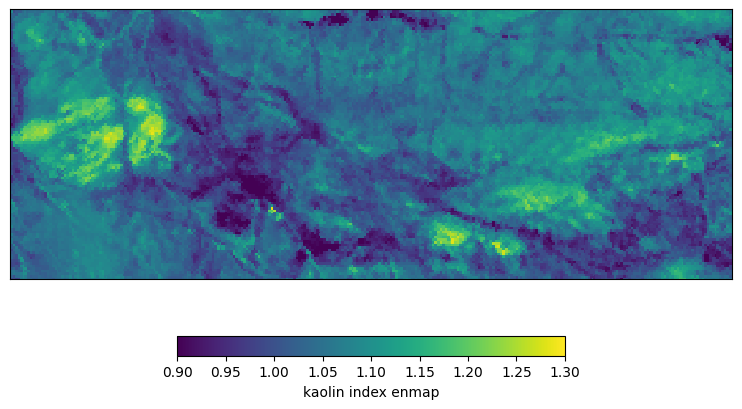

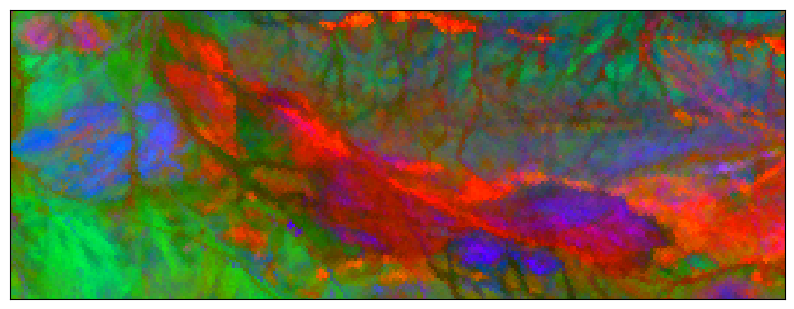

In [14]:
#Emit
calcite_emit= band_ratio (emit_ep, (2190.,2224.),(2293.,2345.))
calcite_emit.data *= band_ratio (emit_ep, (2375.6,2430.),(2293.,2345.)).data
calcite_emit.set_as_nan(0)
fig,ax =calcite_emit.quick_plot(vmin=1., vmax=1.3, figsize=(10,5))
cbar = fig.colorbar( ax.cbar, orientation='horizontal', shrink=0.5)
cbar.set_label("  index carbonite enmap")
Fe3_emit = band_ratio(emit_ep, 600., 570.)
Fe3_emit.set_as_nan(0)
fig,ax =Fe3_emit.quick_plot(0, vmin=1., vmax=1.4, figsize=(10,5))
cbar = fig.colorbar( ax.cbar, orientation='horizontal', shrink=0.5)
cbar.set_label("Fe3 index enmap")
fig.show()
kaolin_emit = band_ratio(emit_ep,(1600., 1700.),(2145.,2185.))
kaolin_emit.data *= band_ratio (emit_ep, (2295.,2365.),(2185.,2225.)).data
kaolin_emit.set_as_nan(0)
fig,ax =kaolin_emit.quick_plot(0, vmin=0.9, vmax=1.3, figsize=(10,5))
cbar = fig.colorbar( ax.cbar, orientation='horizontal', shrink=0.5)
cbar.set_label("kaolin index enmap")
fig.show()

#Emit
stack_emit_ep = hylite.HyImage(np.clip(np.dstack([(calcite_emit.data - 1.0) / 0.3,
                                                      (Fe3_emit.data-1.) / 0.4,
                                                      (kaolin_emit.data - 1.) / 0.25]), 0, 1))
#projection
stack_emit_ep.set_projection_EPSG( emit_ep.get_projection_EPSG())
stack_emit_ep.affine = emit_ep.affine
fig,ax = stack_emit_ep.quick_plot((0,1,2),figsize=(10,5), ticks =False)

In [15]:
io.save('/Users/rachdi18/Documents/Namibia_Epembe/Results/BR/emit_BR', stack_emit_ep)

In [4]:
prisma_ep = io.load('/Users/rachdi18/Documents/Namibia_Epembe/final_subsets/final/prisma_final_sub.hdr')

In [5]:
prisma_ep.get_wavelengths()

array([ 406.993408,  415.838989,  423.78476 ,  431.334686,  438.656891,
        446.014709,  453.389465,  460.73175 ,  468.098419,  475.318848,
        482.548157,  489.794861,  497.058655,  504.511719,  512.046387,
        519.543762,  527.305298,  535.052551,  542.885132,  550.914612,
        559.020264,  567.206116,  575.486816,  583.844116,  592.338989,
        601.014404,  609.958191,  618.719971,  627.778442,  636.67627 ,
        645.963806,  655.418762,  664.894104,  674.464355,  684.137268,
        694.128357,  703.737   ,  713.726868,  723.879944,  733.9552  ,
        744.149536,  754.469604,  764.856445,  775.273499,  785.659546,
        796.127014,  806.71106 ,  817.311035,  827.919495,  838.527222,
        849.209961,  859.973145,  870.742554,  881.456055,  892.080933,
        902.801636,  913.445068,  923.950195,  934.112061,  944.627319,
        956.271484,  967.026672,  977.365417,  979.223999,  988.917908,
        998.908203, 1008.644287, 1018.535706, 1029.343994, 1037.

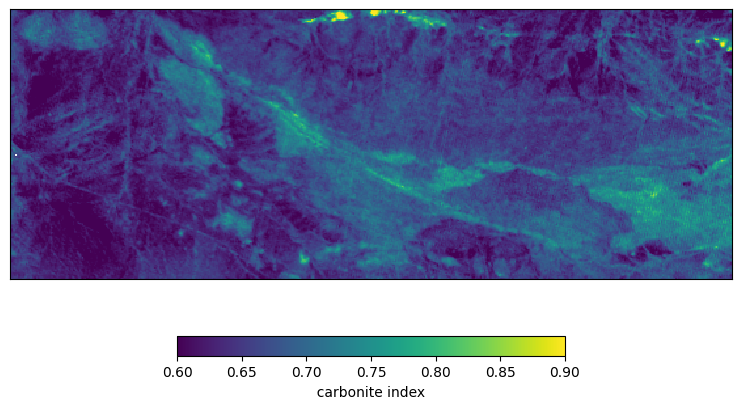

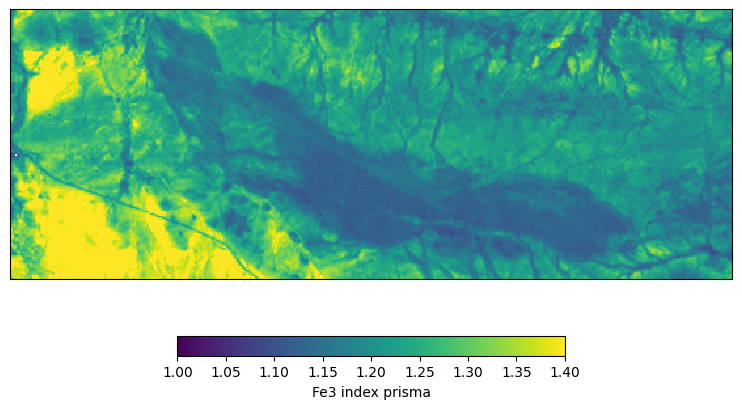

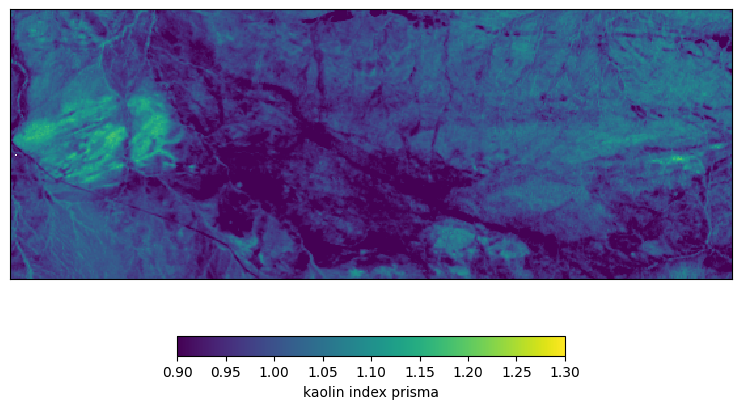

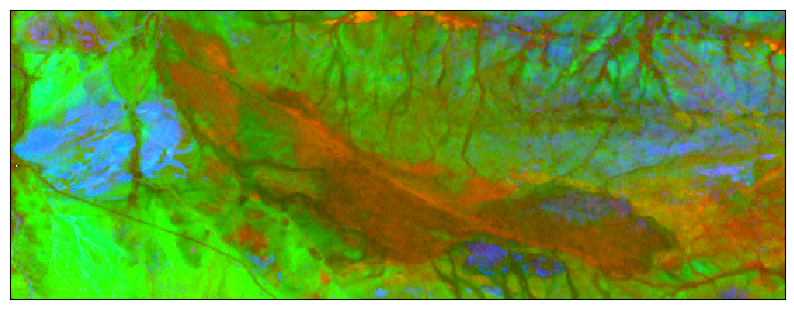

In [19]:
#PRISMA
calcite_prisma= band_ratio (prisma_ep, (2190.,2224.),(2293.,2345.))
calcite_prisma.data *= band_ratio (prisma_ep, (2375.6,2430.),(2293.,2345.)).data
calcite_prisma.set_as_nan(0)
fig,ax =calcite_prisma.quick_plot(vmin=0.6, vmax=0.9, figsize=(10,5))
cbar = fig.colorbar( ax.cbar, orientation='horizontal', shrink=0.5)
cbar.set_label("  carbonite index  ")
Fe3_prisma = band_ratio(prisma_ep, 600., 570.)
Fe3_prisma.set_as_nan(0)
fig,ax =Fe3_prisma.quick_plot(0, vmin=1., vmax=1.4, figsize=(10,5))
cbar = fig.colorbar( ax.cbar, orientation='horizontal', shrink=0.5)
cbar.set_label("Fe3 index prisma")
fig.show()
kaolin_prisma = band_ratio(prisma_ep,(1600., 1700.),(2145.,2185.))
kaolin_prisma.data *= band_ratio (prisma_ep, (2295.,2365.),(2185.,2225.)).data
kaolin_prisma.set_as_nan(0)
fig,ax =kaolin_prisma.quick_plot(0, vmin=0.9, vmax=1.3, figsize=(10,5))
cbar = fig.colorbar( ax.cbar, orientation='horizontal', shrink=0.5)
cbar.set_label("kaolin index prisma")
fig.show()

stack_prisma_ep = hylite.HyImage(np.clip(np.dstack([(calcite_prisma.data - 0.55) / 0.3,
                                                      (Fe3_prisma.data-1) / 0.4,
                                                      (kaolin_prisma.data - 1) / 0.1]), 0, 1))
#projection
stack_prisma_ep.set_projection_EPSG( prisma_ep.get_projection_EPSG())
stack_prisma_ep.affine = prisma_ep.affine
fig,ax = stack_prisma_ep.quick_plot((0,1,2),figsize=(10,5), ticks =False)

In [20]:
io.save('/Users/rachdi18/Documents/Namibia_Epembe/Results/BR/prisma_BR', stack_prisma_ep)